<a href="https://colab.research.google.com/github/nathan-createcode/Electronic-Election-Apps/blob/main/Analisis_Prediksi_Biaya_Asuransi_Medis_Menggunakan_Regresi_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import an

Saving medical_insurance.csv to medical_insurance (2).csv


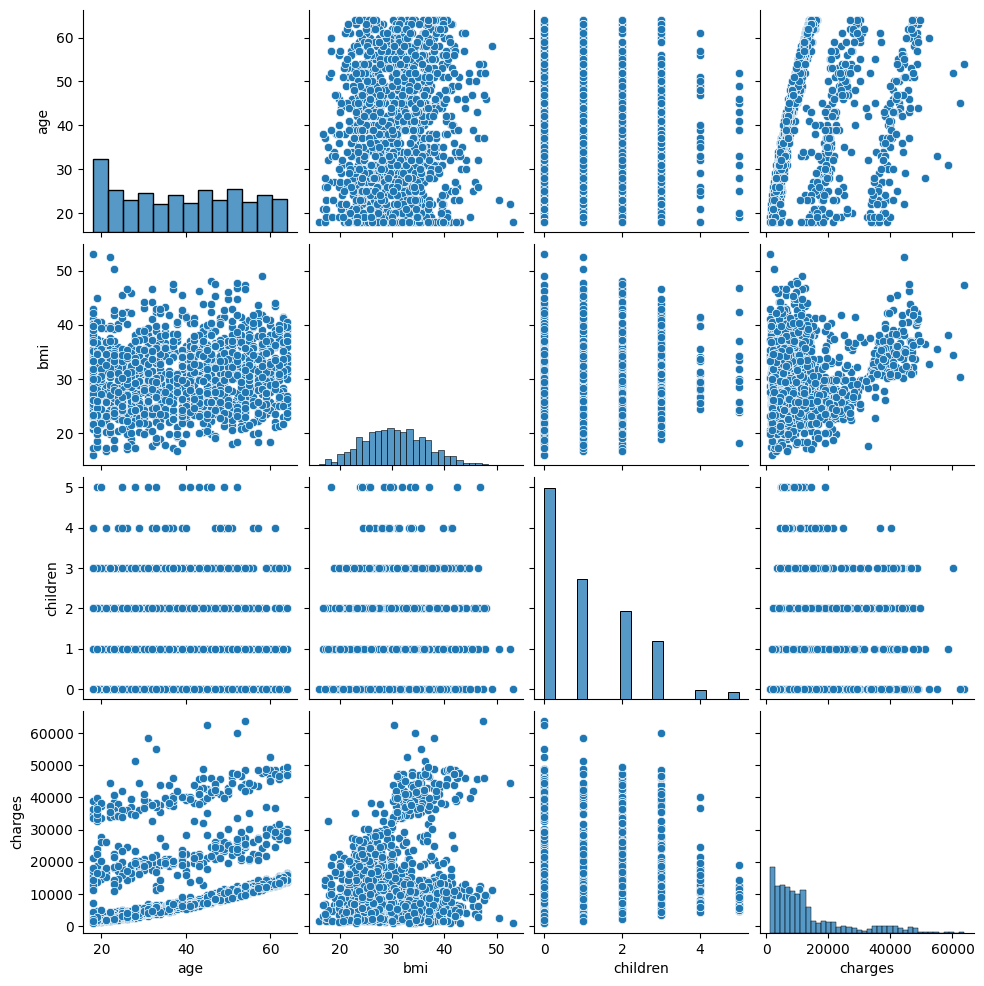

Mean Squared Error: 39922479.35435013
R-squared: 0.7398864322395977


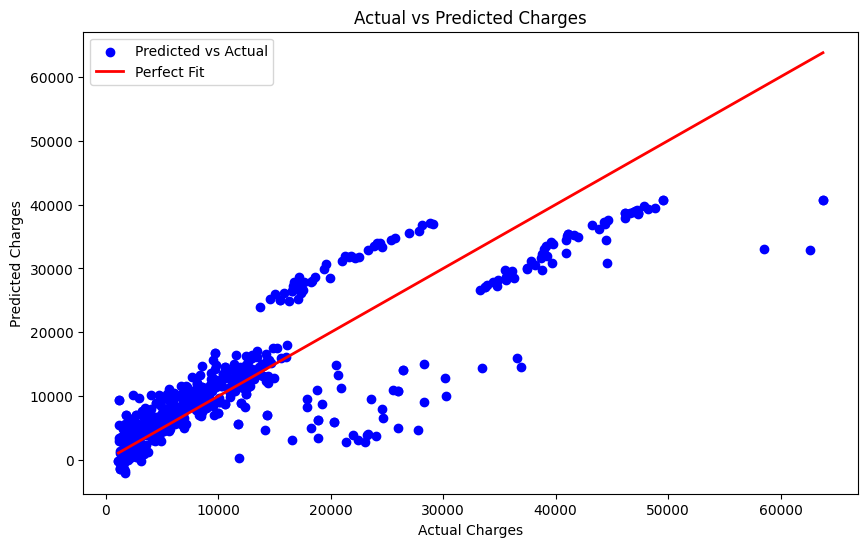

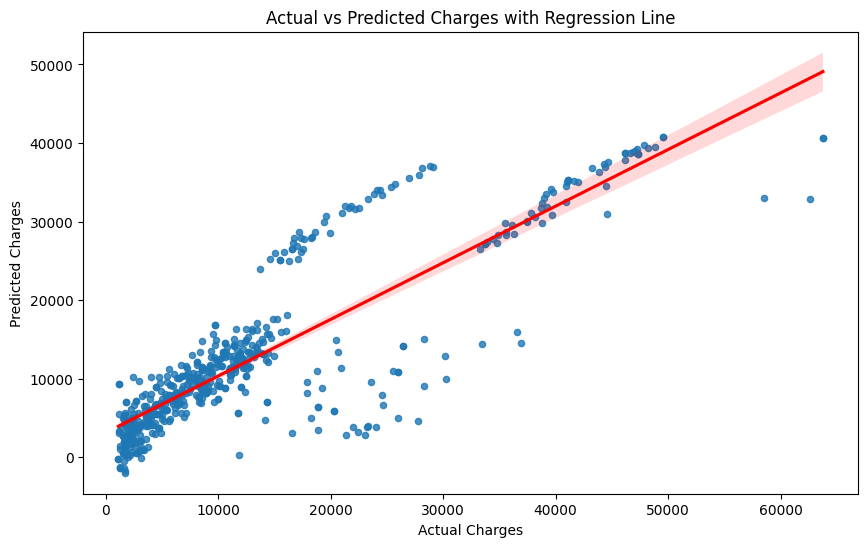

In [18]:
# Import library untuk mengunggah file
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Unggah file dari file manager
uploaded = files.upload()

# Setelah file diunggah, file akan disimpan dengan nama yang sama
# Load dataset dari file yang diunggah
data = pd.read_csv('medical_insurance.csv') # Create dataframe from uploaded file

# Exploratory Data Analysis (EDA)
sns.pairplot(data)
plt.show()

# Encode categorical variables
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['smoker'] = le.fit_transform(data['smoker'])
data['region'] = le.fit_transform(data['region'])

# Split data into features and target
X = data.drop(columns=['charges'])
y = data['charges']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot actual vs predicted charges
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Fit')

# Add labels and title
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")

# Display the plot
plt.legend()
plt.show()

# Plot regression line with seaborn regplot
plt.figure(figsize=(10, 6))

# Use seaborn to plot actual vs predicted with a regression line
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 20}, line_kws={"color": "red"})

# Add labels and title
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges with Regression Line")

# Display the plot
plt.show()
